In [ ]:
import numpy as np
import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [ ]:
data_dir = os.path.join('drive', 'MyDrive', 'data')

##CREATE DATASET MANUALLY

In [ ]:
labels = ['not_ripples', 'transition', 'ripples']
img_size = 100
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Dataset for first classification

In [ ]:
train = get_data(os.path.join(data_dir, 'Lines_for_train', '20x20', 'Lineas_Sonarwiz', 'train'))
val = get_data(os.path.join(data_dir, 'Lines_for_train', '20x20', 'Lineas_Sonarwiz', 'test'))

<ipython-input-3-2c2802813d4f>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train)
x_val = np.array(x_val)

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train, test_size=0.3)
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)

Dataset for fourier classification

In [ ]:
train_FT = get_data(os.path.join(data_dir, 'Lines_for_train', '20x20', 'Lineas_Sonarwiz', 'ft', 'train'))
val_FT = get_data(os.path.join(data_dir, 'Lines_for_train', '20x20', 'Lineas_Sonarwiz', 'ft', 'test'))

<ipython-input-3-2c2802813d4f>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
x_train_FT = []
y_train_FT = []
x_val_FT = []
y_val_FT = []

for feature, label in train_FT:
  x_train_FT.append(feature)
  y_train_FT.append(label)

for feature, label in val_FT:
  x_val_FT.append(feature)
  y_val_FT.append(label)

# Normalize the data
x_train_FT = np.array(x_train_FT)
x_val_FT = np.array(x_val_FT)

x_train_FT.reshape(-1, img_size, img_size, 1)
y_train_FT = np.array(y_train_FT)

x_val_FT.reshape(-1, img_size, img_size, 1)
y_val_FT = np.array(y_val_FT)

In [ ]:
x_train_FT,x_val_FT,y_train_FT,y_val_FT=train_test_split(x_train_FT,y_train_FT, test_size=0.3)
y_train_FT=to_categorical(y_train_FT)
y_val_FT=to_categorical(y_val_FT)

In [ ]:
train_generator = image.ImageDataGenerator(rotation_range=2, horizontal_flip=True, vertical_flip=True)
val_generator = image.ImageDataGenerator(rotation_range=2, horizontal_flip=True, vertical_flip=True)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train_FT)
val_generator.fit(x_val_FT)

Dataset for Surface Roughness classification

In [ ]:
train_SR = get_data(os.path.join(data_dir, 'Lines_for_train', '20x20', 'Lineas_Sonarwiz', 'attribute', 'train'))
val_SR = get_data(os.path.join(data_dir, 'Lines_for_train', '20x20', 'Lineas_Sonarwiz', 'attribute', 'test'))

<ipython-input-3-2c2802813d4f>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
x_train_SR = []
y_train_SR = []
x_val_SR = []
y_val_SR = []

for feature, label in train_SR:
  x_train_SR.append(feature)
  y_train_SR.append(label)

for feature, label in val_SR:
  x_val_SR.append(feature)
  y_val_SR.append(label)

# Normalize the data
x_train_SR = np.array(x_train_SR)
x_val_SR = np.array(x_val_SR)

x_train_SR.reshape(-1, img_size, img_size, 1)
y_train_SR = np.array(y_train_SR)

x_val_SR.reshape(-1, img_size, img_size, 1)
y_val_SR = np.array(y_val_SR)

In [ ]:
x_train_SR,x_val_SR,y_train_SR,y_val_SR=train_test_split(x_train_SR,y_train_SR, test_size=0.3)
y_train_SR=to_categorical(y_train_SR)
y_val_SR=to_categorical(y_val_SR)

##CREATING FOLDER FOR LOGS

In [ ]:
logdir= os.path.join(data_dir, 'logs')

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

##USING EXISTING NEURAL NETWORK MODELS

In [ ]:
from tensorflow.keras.applications import ResNet50, efficientnet_v2, VGG16, DenseNet121

In [ ]:
# Initialize the Pretrained Model
#--------------------ResNet50-------------------
ResNet50_feature_extractor_20by20 = ResNet50(weights='imagenet', input_shape=(100, 100, 3), include_top=False)
#----------------EfficientNetV2S----------------
ENV2S_feature_extractor_20by20 = efficientnet_v2.EfficientNetV2S(weights='imagenet', input_shape=(100, 100, 3), include_top=False, include_preprocessing=True)
#---------------------VGG16---------------------
VGG16_feature_extractor_20by20 = VGG16(weights='imagenet', input_shape=(100, 100, 3), include_top=False)
#------------------DenseNet121------------------
DenseNet121_feature_extractor_20by20 = DenseNet121(weights='imagenet', input_shape=(100, 100, 3), include_top=False)

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
# Set this parameter to make sure it's not being trained
#--------------------ResNet50-------------------
ResNet50_feature_extractor_20by20.trainable = False
#----------------EfficientNetV2S----------------
ENV2S_feature_extractor_20by20.trainable = False
#---------------------VGG16---------------------
VGG16_feature_extractor_20by20.trainable = False
#------------------DenseNet121------------------
DenseNet121_feature_extractor_20by20.trainable = False

# Set the input layer
#--------------------ResNet50-------------------
ResNet50_input20by20_ = tf.keras.Input(shape=(100, 100, 3))
#----------------EfficientNetV2S----------------
ENV2S_input20by20_ = tf.keras.Input(shape=(100, 100, 3))
#---------------------VGG16---------------------
VGG16_input20by20_ = tf.keras.Input(shape=(100, 100, 3))
#------------------DenseNet121------------------
DenseNet121_input20by20_ = tf.keras.Input(shape=(100, 100, 3))

# Set the feature extractor layer
#--------------------ResNet50-------------------
ResNet50_x20by20 = ResNet50_feature_extractor_20by20(ResNet50_input20by20_, training=False)
#----------------EfficientNetV2S----------------
ENV2S_x20by20 = ENV2S_feature_extractor_20by20(ENV2S_input20by20_, training=False)
#---------------------VGG16---------------------
VGG16_x20by20 = VGG16_feature_extractor_20by20(VGG16_input20by20_, training=False)
#------------------DenseNet121------------------
DenseNet121_x20by20 = DenseNet121_feature_extractor_20by20(DenseNet121_input20by20_, training=False)

# Set the pooling layer for FOURIER TRANSFORM
#----------------EfficientNetV2S----------------
ENV2S_x20by20_FT = tf.keras.layers.GlobalAveragePooling2D()(ENV2S_x20by20)
#------------------DenseNet121------------------
DenseNet121_x20by20_SR = tf.keras.layers.GlobalAveragePooling2D()(DenseNet121_x20by20)

# Set the pooling layer
#--------------------ResNet50-------------------
ResNet50_x20by20 = tf.keras.layers.GlobalAveragePooling2D()(ResNet50_x20by20)
#----------------EfficientNetV2S----------------
ENV2S_x20by20 = tf.keras.layers.GlobalAveragePooling2D()(ENV2S_x20by20)
#---------------------VGG16---------------------
VGG16_x20by20 = tf.keras.layers.GlobalAveragePooling2D()(VGG16_x20by20)
#------------------DenseNet121------------------
DenseNet121_x20by20 = tf.keras.layers.GlobalAveragePooling2D()(DenseNet121_x20by20)

# Set the sigmoid activation function layer
#--------------------ResNet50-------------------
#ResNet50_x20by20 = tf.keras.layers.Dense(3, activation='relu')(ResNet50_x20by20)
#----------------EfficientNetV2S----------------
#ENV2S_output20by20_ = tf.keras.layers.Dense(3, activation='relu')(ENV2S_x20by20)
#---------------------VGG16---------------------
#VGG16_output20by20_ = tf.keras.layers.Dense(3, activation='relu')(VGG16_x20by20)
#------------------DenseNet121------------------
#DenseNet121_output20by20_ = tf.keras.layers.Dense(3, activation='relu')(DenseNet121_x20by20)

# Set layer with dropout rate function
#--------------------ResNet50-------------------
ResNet50_x20by20 = tf.keras.layers.Dropout(0.2)(ResNet50_x20by20)
#----------------EfficientNetV2S----------------
ENV2S_x20by20 = tf.keras.layers.Dropout(0.2)(ENV2S_x20by20)
#---------------------VGG16---------------------
VGG16_x20by20 = tf.keras.layers.Dropout(0.2)(VGG16_x20by20)
#------------------DenseNet121------------------
DenseNet121_x20by20 = tf.keras.layers.Dropout(0.2)(DenseNet121_x20by20)

# Set layer with dropout rate function for FOURIER TRANSFORM
#----------------EfficientNetV2S----------------
#ENV2S_x20by20_FT = tf.keras.layers.Dropout(0.5)(ENV2S_x20by20_FT)


# Set first dense layer with sigmoid activation function
#--------------------ResNet50-------------------
ResNet50_x20by20 = tf.keras.layers.Dense(50, activation='sigmoid')(ResNet50_x20by20)
#----------------EfficientNetV2S----------------
ENV2S_x20by20 = tf.keras.layers.Dense(50, activation='sigmoid')(ENV2S_x20by20)
#---------------------VGG16---------------------
VGG16_x20by20 = tf.keras.layers.Dense(50, activation='sigmoid')(VGG16_x20by20)
#------------------DenseNet121------------------
DenseNet121_x20by20 = tf.keras.layers.Dense(50, activation='sigmoid')(DenseNet121_x20by20)


# Set first dense layer with sigmoid activation function FOR FOURIER TRANSFORM
#----------------EfficientNetV2S----------------
ENV2S_x20by20_FT = tf.keras.layers.Dense(50, activation='sigmoid')(ENV2S_x20by20_FT)
# Set the final layer with sigmoid activation function FOR SURFACE ROUGHNESS
#------------------DenseNet121------------------
DenseNet121_x20by20_SR = tf.keras.layers.Dense(50, activation='sigmoid')(DenseNet121_x20by20_SR)

# Set the final layer with sigmoid activation function
#--------------------ResNet50-------------------
ResNet50_output20by20_ = tf.keras.layers.Dense(3, activation='softmax')(ResNet50_x20by20)
#----------------EfficientNetV2S----------------
ENV2S_output20by20_ = tf.keras.layers.Dense(3, activation='softmax')(ENV2S_x20by20)
#---------------------VGG16---------------------
VGG16_output20by20_ = tf.keras.layers.Dense(3, activation='softmax')(VGG16_x20by20)
#------------------DenseNet121------------------
DenseNet121_output20by20_ = tf.keras.layers.Dense(3, activation='softmax')(DenseNet121_x20by20)


# Set the final layer with sigmoid activation function FOR FOURIER TRANSFORM
#----------------EfficientNetV2S----------------
ENV2S_output20by20_FT = tf.keras.layers.Dense(3, activation='softmax')(ENV2S_x20by20_FT)
# Set the final layer with sigmoid activation function FOR SURFACE ROUGHNESS
#------------------DenseNet121------------------
DenseNet121_output20by20_SR = tf.keras.layers.Dense(3, activation='softmax')(DenseNet121_x20by20_SR)

In [ ]:
# Create the new model object
#--------------------ResNet50-------------------
ResNet50_model_20by20 = tf.keras.Model(ResNet50_input20by20_, ResNet50_output20by20_)
#----------------EfficientNetV2S----------------
ENV2S_model_20by20 = tf.keras.Model(ENV2S_input20by20_, ENV2S_output20by20_)
#---------------------VGG16---------------------
VGG16_model_20by20 = tf.keras.Model(VGG16_input20by20_, VGG16_output20by20_)
#------------------DenseNet121------------------
DenseNet121_model_20by20 = tf.keras.Model(DenseNet121_input20by20_, DenseNet121_output20by20_)

#FOURIER CLASSIFICATION
#----------------EfficientNetV2S----------------
ENV2S_model_20by20_FT = tf.keras.Model(ENV2S_input20by20_, ENV2S_output20by20_FT)

#SURFACE ROUGHNESS CLASSIFICATION
#------------------DenseNet121------------------
DenseNet121_model_20by20_SR = tf.keras.Model(DenseNet121_input20by20_, DenseNet121_output20by20_SR)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
opt_ENV2S = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
opt_VGG16 = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
opt_DenseNet121 = tf.keras.optimizers.legacy.Adam(learning_rate=0.0002)
opt_DenseNet121_SR = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
opt_ENV2S_FT = tf.keras.optimizers.legacy.Adam(learning_rate=0.1)
# Compile it
#--------------------ResNet50-------------------
ResNet50_model_20by20.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#----------------EfficientNetV2S----------------
ENV2S_model_20by20.compile(optimizer=opt_ENV2S, loss='categorical_crossentropy', metrics=['accuracy'])
#---------------------VGG16---------------------
VGG16_model_20by20.compile(optimizer=opt_VGG16, loss='categorical_crossentropy', metrics=['accuracy'])
#------------------DenseNet121------------------
DenseNet121_model_20by20.compile(optimizer=opt_DenseNet121, loss='categorical_crossentropy', metrics=['accuracy'])

#FOURIER CLASSIFICATION
#----------------EfficientNetV2S----------------
ENV2S_model_20by20_FT.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

#SURFACE ROUGHNESS CLASSIFICATION
#------------------DenseNet121------------------
DenseNet121_model_20by20_SR.compile(optimizer=opt_DenseNet121_SR, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01,  patience=3, min_lr=1e-7)

In [ ]:
ENV2S_model_20by20_FT.summary()

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 efficientnetv2-s (Functiona  (None, 4, 4, 1280)       20331360  
 l)                                                              
                                                                 
 global_average_pooling2d_24  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_52 (Dense)            (None, 50)                64050     
                                                                 
 dense_58 (Dense)            (None, 3)                 153       
                                                                 
Total params: 20,395,563
Trainable params: 64,203
Non-trai

#--------------------------------TRAINING MODEL FOR FIRST CLASSIFICATION--------------------------------

##TRAINING AND SAVING RESNET50 MODEL

In [ ]:
hist_ResNet50_20by20 = ResNet50_model_20by20.fit(x_train,y_train, epochs=75, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/75
55/55 [==============================] - 9s 67ms/step - loss: 0.7641 - accuracy: 0.7046 - val_loss: 0.5813 - val_accuracy: 0.8162
Epoch 2/75
55/55 [==============================] - 2s 41ms/step - loss: 0.4927 - accuracy: 0.8509 - val_loss: 0.4559 - val_accuracy: 0.8336
Epoch 3/75
55/55 [==============================] - 3s 54ms/step - loss: 0.4099 - accuracy: 0.8571 - val_loss: 0.4098 - val_accuracy: 0.8336
Epoch 4/75
55/55 [==============================] - 2s 42ms/step - loss: 0.3674 - accuracy: 0.8629 - val_loss: 0.3767 - val_accuracy: 0.8455
Epoch 5/75
55/55 [==============================] - 3s 55ms/step - loss: 0.3406 - accuracy: 0.8726 - val_loss: 0.3592 - val_accuracy: 0.8509
Epoch 6/75
55/55 [==============================] - 3s 56ms/step - loss: 0.3246 - accuracy: 0.8783 - val_loss: 0.3449 - val_accuracy: 0.8655
Epoch 7/75
55/55 [==============================] - 2s 42ms/step - loss: 0.3066 - accuracy: 0.8777 - val_loss: 0.3310 - val_accuracy: 0.8628
Epoch 8/75
55

In [ ]:
ResNet50_model_20by20.save(os.path.join(data_dir,'imageclassifier_3classes_ResNet50_20x20_70epoch.h5'))

##TRAINING AND SAVING ENV2S MODEL

In [ ]:
hist_ENV2S_20by20 = ENV2S_model_20by20.fit(x_train,y_train, epochs=200, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/200
55/55 [==============================] - 24s 169ms/step - loss: 0.9708 - accuracy: 0.5086 - val_loss: 0.8673 - val_accuracy: 0.5686
Epoch 2/200
55/55 [==============================] - 4s 65ms/step - loss: 0.7928 - accuracy: 0.6731 - val_loss: 0.7704 - val_accuracy: 0.6711
Epoch 3/200
55/55 [==============================] - 4s 65ms/step - loss: 0.7053 - accuracy: 0.7709 - val_loss: 0.6925 - val_accuracy: 0.7776
Epoch 4/200
55/55 [==============================] - 4s 68ms/step - loss: 0.6351 - accuracy: 0.8206 - val_loss: 0.6344 - val_accuracy: 0.8043
Epoch 5/200
55/55 [==============================] - 4s 65ms/step - loss: 0.5852 - accuracy: 0.8377 - val_loss: 0.5887 - val_accuracy: 0.8176
Epoch 6/200
55/55 [==============================] - 4s 65ms/step - loss: 0.5429 - accuracy: 0.8400 - val_loss: 0.5509 - val_accuracy: 0.8242
Epoch 7/200
55/55 [==============================] - 4s 66ms/step - loss: 0.5125 - accuracy: 0.8434 - val_loss: 0.5196 - val_accuracy: 0.8282
Epoc

In [ ]:
ENV2S_model_20by20.save(os.path.join(data_dir,'imageclassifier_3classes_ENV2S_20x20_200epoch_V2.h5'))

##TRAINING AND SAVING VGG-16 MODEL

In [ ]:
hist_VGG16_20by20 = VGG16_model_20by20.fit(x_train,y_train, epochs=200, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/200
55/55 [==============================] - 7s 103ms/step - loss: 0.9601 - accuracy: 0.5554 - val_loss: 0.7422 - val_accuracy: 0.7244
Epoch 2/200
55/55 [==============================] - 3s 46ms/step - loss: 0.7067 - accuracy: 0.7611 - val_loss: 0.6033 - val_accuracy: 0.7989
Epoch 3/200
55/55 [==============================] - 3s 46ms/step - loss: 0.5821 - accuracy: 0.8257 - val_loss: 0.5282 - val_accuracy: 0.8162
Epoch 4/200
55/55 [==============================] - 3s 56ms/step - loss: 0.5142 - accuracy: 0.8371 - val_loss: 0.4799 - val_accuracy: 0.8256
Epoch 5/200
55/55 [==============================] - 3s 56ms/step - loss: 0.4724 - accuracy: 0.8474 - val_loss: 0.4503 - val_accuracy: 0.8322
Epoch 6/200
55/55 [==============================] - 3s 58ms/step - loss: 0.4362 - accuracy: 0.8503 - val_loss: 0.4248 - val_accuracy: 0.8349
Epoch 7/200
55/55 [==============================] - 3s 57ms/step - loss: 0.4072 - accuracy: 0.8589 - val_loss: 0.4082 - val_accuracy: 0.8375
Epoch

In [ ]:
VGG16_model_20by20.save(os.path.join(data_dir,'imageclassifier_3classes_VGG16_20x20_200epoch_V2.h5'))

##TRAINING AND SAVING DENSETNET121 MODEL

In [ ]:
hist_DenseNet121_20by20 = DenseNet121_model_20by20.fit(x_train,y_train, epochs=200, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/200
55/55 [==============================] - 13s 88ms/step - loss: 0.8855 - accuracy: 0.6131 - val_loss: 0.6956 - val_accuracy: 0.7297
Epoch 2/200
55/55 [==============================] - 2s 39ms/step - loss: 0.6949 - accuracy: 0.7349 - val_loss: 0.5861 - val_accuracy: 0.7537
Epoch 3/200
55/55 [==============================] - 2s 41ms/step - loss: 0.6186 - accuracy: 0.7640 - val_loss: 0.5335 - val_accuracy: 0.7750
Epoch 4/200
55/55 [==============================] - 2s 38ms/step - loss: 0.5538 - accuracy: 0.7834 - val_loss: 0.5012 - val_accuracy: 0.7896
Epoch 5/200
55/55 [==============================] - 2s 38ms/step - loss: 0.5343 - accuracy: 0.7891 - val_loss: 0.4895 - val_accuracy: 0.7883
Epoch 6/200
55/55 [==============================] - 2s 38ms/step - loss: 0.5251 - accuracy: 0.7903 - val_loss: 0.4890 - val_accuracy: 0.7976
Epoch 7/200
55/55 [==============================] - 2s 37ms/step - loss: 0.4990 - accuracy: 0.8074 - val_loss: 0.4742 - val_accuracy: 0.7896
Epoch

In [ ]:
DenseNet121_model_20by20.save(os.path.join(data_dir,'imageclassifier_3classes_DenseNet121_20x20_200epoch.h5'))

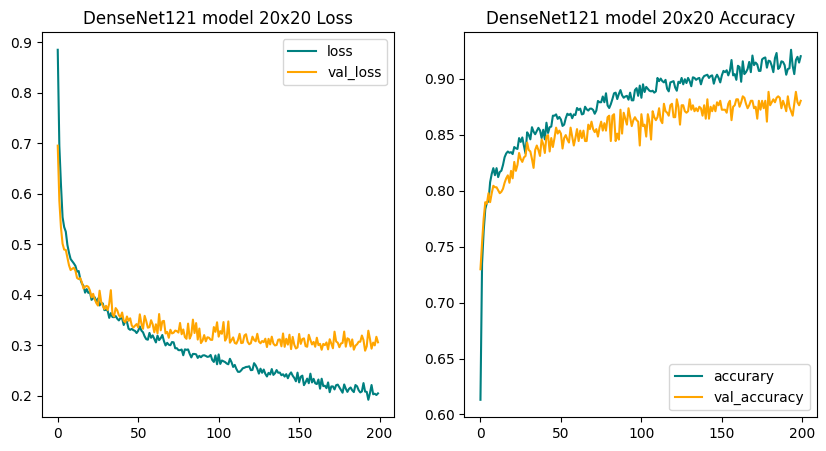

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_DenseNet121_20by20.history['loss'], color='teal', label='loss')
ax[0].plot(hist_DenseNet121_20by20.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('DenseNet121 model 20x20 Loss')
ax[0].legend(loc="upper right")
#ax[0].set_ylim([0, 10])

ax[1].plot(hist_DenseNet121_20by20.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_DenseNet121_20by20.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('DenseNet121 model 20x20 Accuracy')
ax[1].legend(loc="lower right")
#ax[1].set_ylim([0.5, 1])

#------------------------------TRAINING MODEL FOR FOURIER CLASSIFICATION------------------------------

##TRAINING AND SAVING RESNET50 MODEL FOR FOURIER CLASSIFICATION

In [ ]:
pretrained_model = tf.keras.applications.resnet50.ResNet50(
                    input_shape=(100, 100, 3),
                    include_top=False,
                    weights='imagenet',
                    pooling='avg')

pretrained_model.trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(50, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']         

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
history = model.fit(x_train_FT,y_train_FT,validation_data=(x_val_FT, y_val_FT),epochs=250,
    callbacks=[callbacks])

Epoch 1/250
5/5 [==============================] - 16s 2s/step - loss: 1.2578 - accuracy: 0.4106 - val_loss: 0.8906 - val_accuracy: 0.6154
Epoch 2/250
5/5 [==============================] - 13s 3s/step - loss: 0.8148 - accuracy: 0.6358 - val_loss: 0.7726 - val_accuracy: 0.7077
Epoch 3/250
5/5 [==============================] - 11s 2s/step - loss: 0.6449 - accuracy: 0.7219 - val_loss: 0.5296 - val_accuracy: 0.8308
Epoch 4/250
5/5 [==============================] - 11s 2s/step - loss: 0.4961 - accuracy: 0.8146 - val_loss: 0.4466 - val_accuracy: 0.8462
Epoch 5/250
5/5 [==============================] - 11s 2s/step - loss: 0.4323 - accuracy: 0.8675 - val_loss: 0.3946 - val_accuracy: 0.8615
Epoch 6/250
5/5 [==============================] - 9s 2s/step - loss: 0.3520 - accuracy: 0.8874 - val_loss: 0.4342 - val_accuracy: 0.8308
Epoch 7/250
5/5 [==============================] - 11s 2s/step - loss: 0.3733 - accuracy: 0.8344 - val_loss: 0.4480 - val_accuracy: 0.7692
Epoch 8/250
5/5 [===========

In [ ]:
model.save(os.path.join(data_dir,'imageclassifier_3classes_model_20x20_70epoch_FT.h5'))

##TRAINING AND SAVING ENV2S MODEL FOR FOURIER CLASSIFICATION

In [ ]:
hist_ENV2S_20by20_FT = ENV2S_model_20by20_FT.fit(train_generator.flow(x_train_FT, y_train_FT), epochs=200,
                                                 validation_data=val_generator.flow(x_val_FT, y_val_FT), callbacks = [tensorboard_callback], verbose = 1)

Epoch 1/200
5/5 [==============================] - 21s 1s/step - loss: 1.1356 - accuracy: 0.3311 - val_loss: 0.9600 - val_accuracy: 0.5692
Epoch 2/200
5/5 [==============================] - 1s 159ms/step - loss: 0.9982 - accuracy: 0.4636 - val_loss: 0.9326 - val_accuracy: 0.6000
Epoch 3/200
5/5 [==============================] - 1s 251ms/step - loss: 0.9110 - accuracy: 0.5695 - val_loss: 0.9233 - val_accuracy: 0.6462
Epoch 4/200
5/5 [==============================] - 1s 266ms/step - loss: 0.8572 - accuracy: 0.6490 - val_loss: 0.9393 - val_accuracy: 0.6000
Epoch 5/200
5/5 [==============================] - 1s 262ms/step - loss: 0.8222 - accuracy: 0.6623 - val_loss: 0.8821 - val_accuracy: 0.6154
Epoch 6/200
5/5 [==============================] - 1s 209ms/step - loss: 0.7891 - accuracy: 0.6358 - val_loss: 0.8536 - val_accuracy: 0.6308
Epoch 7/200
5/5 [==============================] - 1s 169ms/step - loss: 0.7669 - accuracy: 0.6424 - val_loss: 0.8460 - val_accuracy: 0.6154
Epoch 8/200
5/5

In [ ]:
ENV2S_model_20by20_FT.save(os.path.join(data_dir,'imageclassifier_3classes_ENV2S_20x20_200epoch_FT.h5'))

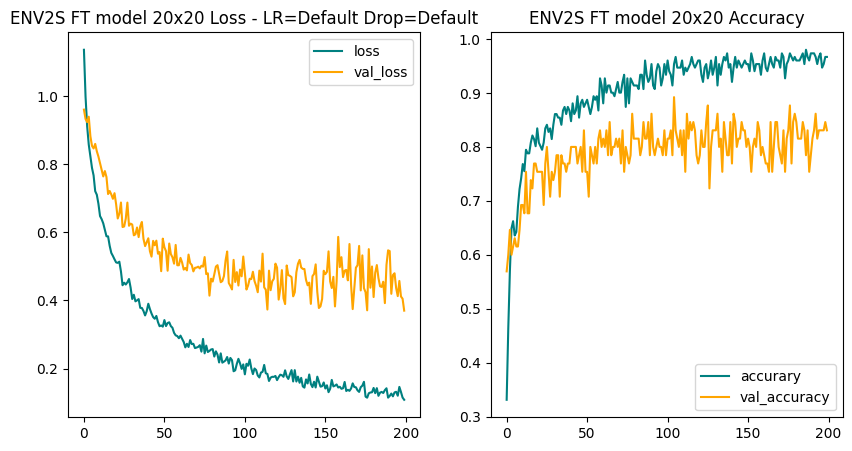

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_ENV2S_20by20_FT.history['loss'], color='teal', label='loss')
ax[0].plot(hist_ENV2S_20by20_FT.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('ENV2S FT model 20x20 Loss - LR=Default Drop=Default')
ax[0].legend(loc="upper right")
#ax[0].set_ylim([0, 1])

ax[1].plot(hist_ENV2S_20by20_FT.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_ENV2S_20by20_FT.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('ENV2S FT model 20x20 Accuracy')
ax[1].legend(loc="lower right")
#ax[1].set_ylim([0.5, 1])

(0.5, 1.0)

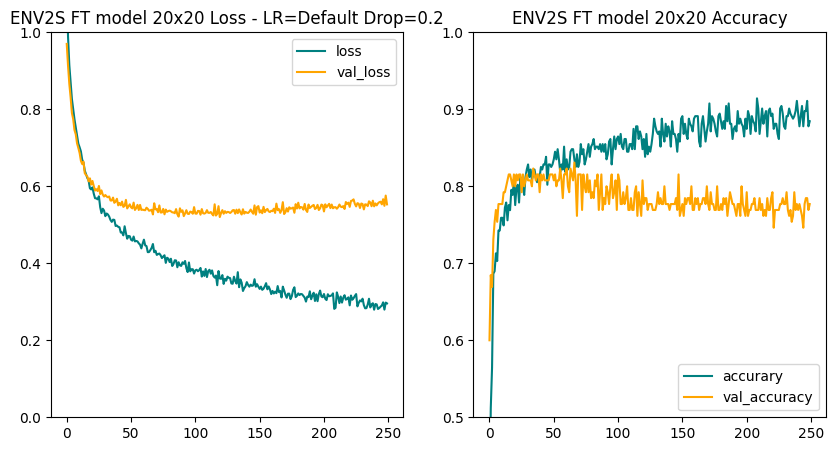

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_ENV2S_20by20_FT.history['loss'], color='teal', label='loss')
ax[0].plot(hist_ENV2S_20by20_FT.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('ENV2S FT model 20x20 Loss - LR=Default Drop=0.2')
ax[0].legend(loc="upper right")
ax[0].set_ylim([0, 1])

ax[1].plot(hist_ENV2S_20by20_FT.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_ENV2S_20by20_FT.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('ENV2S FT model 20x20 Accuracy')
ax[1].legend(loc="lower right")
ax[1].set_ylim([0.5, 1])

(0.5, 1.0)

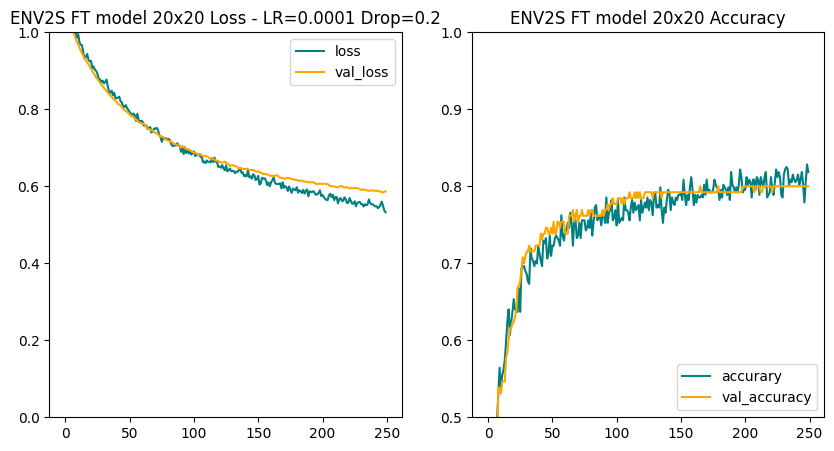

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_ENV2S_20by20_FT.history['loss'], color='teal', label='loss')
ax[0].plot(hist_ENV2S_20by20_FT.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('ENV2S FT model 20x20 Loss - LR=0.0001 Drop=0.2')
ax[0].legend(loc="upper right")
ax[0].set_ylim([0, 1])

ax[1].plot(hist_ENV2S_20by20_FT.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_ENV2S_20by20_FT.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('ENV2S FT model 20x20 Accuracy')
ax[1].legend(loc="lower right")
ax[1].set_ylim([0.5, 1])

(0.5, 1.0)

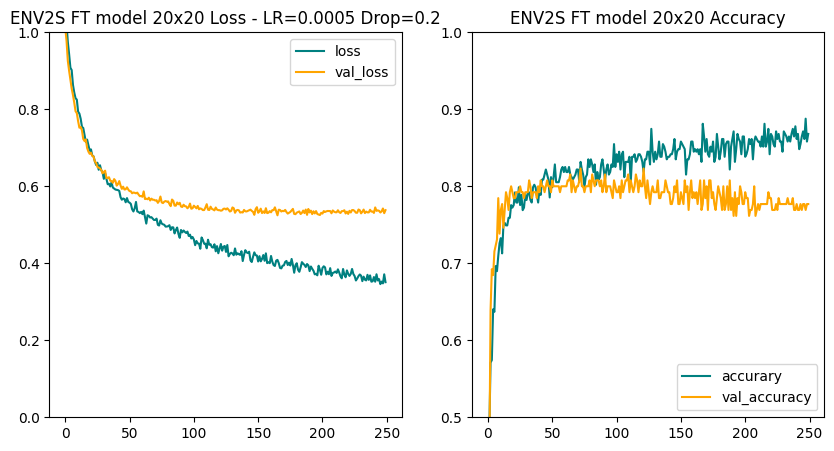

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_ENV2S_20by20_FT.history['loss'], color='teal', label='loss')
ax[0].plot(hist_ENV2S_20by20_FT.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('ENV2S FT model 20x20 Loss - LR=0.0005 Drop=0.2')
ax[0].legend(loc="upper right")
ax[0].set_ylim([0, 1])

ax[1].plot(hist_ENV2S_20by20_FT.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_ENV2S_20by20_FT.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('ENV2S FT model 20x20 Accuracy')
ax[1].legend(loc="lower right")
ax[1].set_ylim([0.5, 1])

(0.5, 1.0)

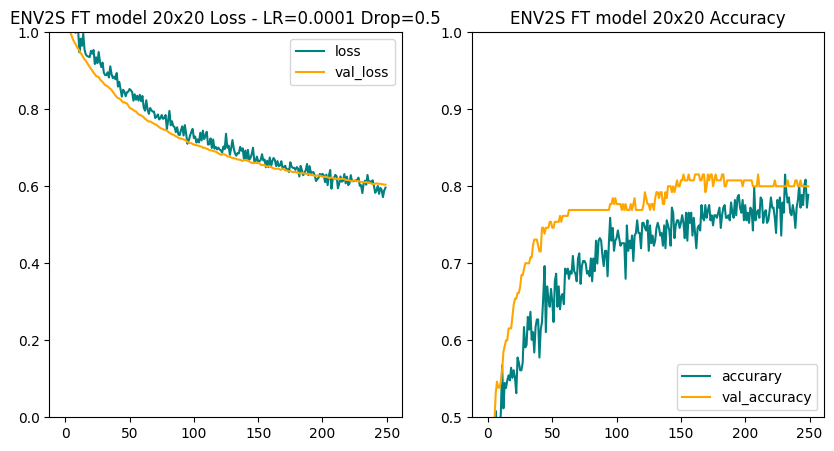

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_ENV2S_20by20_FT.history['loss'], color='teal', label='loss')
ax[0].plot(hist_ENV2S_20by20_FT.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('ENV2S FT model 20x20 Loss - LR=0.0001 Drop=0.5')
ax[0].legend(loc="upper right")
ax[0].set_ylim([0, 1])

ax[1].plot(hist_ENV2S_20by20_FT.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_ENV2S_20by20_FT.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('ENV2S FT model 20x20 Accuracy')
ax[1].legend(loc="lower right")
ax[1].set_ylim([0.5, 1])

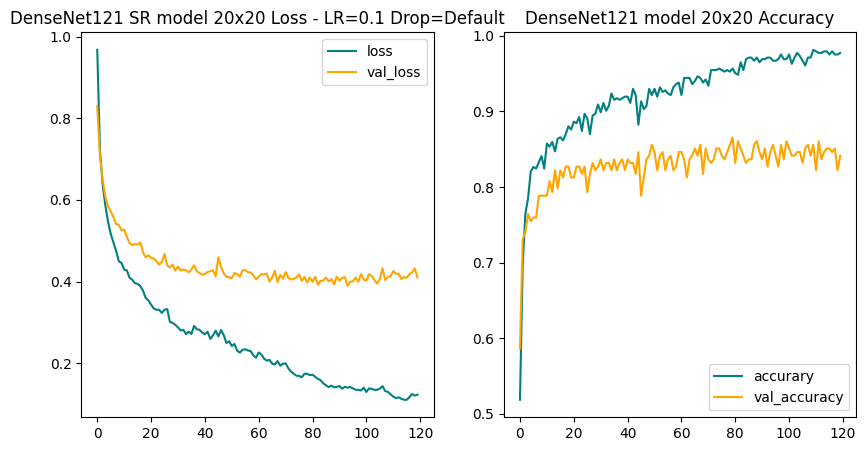

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(hist_DenseNet121_20by20_SR.history['loss'], color='teal', label='loss')
ax[0].plot(hist_DenseNet121_20by20_SR.history['val_loss'], color='orange', label='val_loss')
ax[0].title.set_text('DenseNet121 SR model 20x20 Loss - LR=0.1 Drop=Default')
ax[0].legend(loc="upper right")
#ax[0].set_ylim([0, 1])

ax[1].plot(hist_DenseNet121_20by20_SR.history['accuracy'], color='teal', label='accurary')
ax[1].plot(hist_DenseNet121_20by20_SR.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].title.set_text('DenseNet121 model 20x20 Accuracy')
ax[1].legend(loc="lower right")
#ax[1].set_ylim([0.5, 1])

#-------------------TRAINING MODEL FOR SURFACE ROUGHNESS CLASSIFICATION-------------------

##TRAINING AND SAVING DENSENET121 MODEL FOR SR CLASSIFICATION

In [ ]:
hist_DenseNet121_20by20_SR = DenseNet121_model_20by20_SR.fit(x_train_SR,y_train_SR, epochs=120, validation_data=(x_val_SR, y_val_SR), callbacks=[tensorboard_callback])

Epoch 1/120
16/16 [==============================] - 11s 182ms/step - loss: 0.9675 - accuracy: 0.5186 - val_loss: 0.8303 - val_accuracy: 0.5865
Epoch 2/120
16/16 [==============================] - 1s 50ms/step - loss: 0.7216 - accuracy: 0.6963 - val_loss: 0.7082 - val_accuracy: 0.7308
Epoch 3/120
16/16 [==============================] - 1s 38ms/step - loss: 0.6378 - accuracy: 0.7645 - val_loss: 0.6491 - val_accuracy: 0.7404
Epoch 4/120
16/16 [==============================] - 1s 47ms/step - loss: 0.5866 - accuracy: 0.7851 - val_loss: 0.6078 - val_accuracy: 0.7644
Epoch 5/120
16/16 [==============================] - 1s 48ms/step - loss: 0.5468 - accuracy: 0.8202 - val_loss: 0.5845 - val_accuracy: 0.7548
Epoch 6/120
16/16 [==============================] - 1s 63ms/step - loss: 0.5170 - accuracy: 0.8264 - val_loss: 0.5713 - val_accuracy: 0.7596
Epoch 7/120
16/16 [==============================] - 1s 65ms/step - loss: 0.4959 - accuracy: 0.8244 - val_loss: 0.5586 - val_accuracy: 0.7596
Epoc

In [ ]:
DenseNet121_model_20by20_SR.save(os.path.join(data_dir,'imageclassifier_3classes_DenseNet121_20x20_120epoch_SR_V2.h5'))